# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [24]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')
print(data_train.shape)

(500, 3)


## plot the data

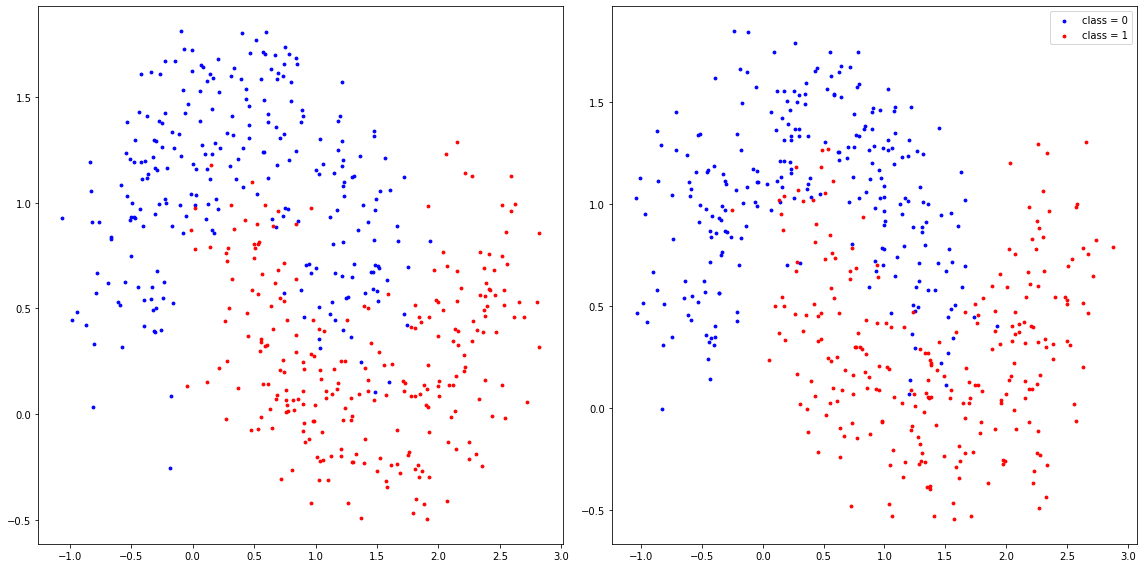

In [16]:
    train_x = data_train[: , 0]
    train_y = data_train[: , 1]
    train_label = data_train[:, 2]

    test_x = data_test[: , 0]
    test_y = data_test[: , 1]
    test_label = data_test[: , 2]

    plt.figure(figsize=(16,8))
    plt.subplot(121)
    class_0 = np.where(train_label == 0)
    class_1 = np.where(train_label == 1)
    plt.scatter(train_x[class_0], train_y[class_0], label = 'class = 0', color='blue', s=8)
    plt.scatter(train_x[class_1], train_y[class_1], label = 'class = 1', color='red',s=8)


    plt.subplot(122)
    class_0 = np.where(test_label == 0)
    class_1 = np.where(test_label == 1)
    plt.scatter(test_x[class_0], test_y[class_0], label = 'class = 0', color='blue', s=8)
    plt.scatter(test_x[class_1], test_y[class_1], label = 'class = 1', color='red',s=8)

    plt.axis('auto')
    plt.legend()
    plt.tight_layout()
    plt.show()

## define feature function

In [17]:
def feature_function(x, y):
    oneVector = np.ones(x.shape)
    feature = np.vstack((oneVector, x ,np.power(x,2), np.power(x,3), y))
    return feature
print(feature_function(train_x, train_y))


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.24997125e+00 1.40069243e+00 1.50240279e+00 ... 1.47130689e-01
  6.95858115e-01 6.55950311e-01]
 [1.56242814e+00 1.96193927e+00 2.25721413e+00 ... 2.16474397e-02
  4.84218516e-01 4.30270810e-01]
 [1.95299026e+00 2.74807348e+00 3.39124480e+00 ... 3.18500273e-03
  3.36947384e-01 2.82236272e-01]
 [5.51167920e-01 5.70863747e-01 5.82709872e-01 ... 1.17685185e+00
  9.63050337e-01 8.87891317e-01]]


## define regression function based on the feature function

In [25]:
def regression_function(theta, feature):
    value = np.matmul(theta, feature)
    return value

## define regularization function on the model parameters

In [26]:
temp = np.array([1,2,3])
sum = np.sum(np.power(temp,2))
print(sum)



14


In [27]:
def regularization_function(theta):
    value = np.sum(np.power(theta,2))
    return value
print(regularization_function([1,2,3,4,5]))

55


## define sigmoid function

In [28]:
def logistic_function(x):
    z = 1 / (1+ np.exp(-x))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [30]:
print(np.finfo(float).eps)

2.220446049250313e-16


In [32]:
def compute_loss_feature(theta, feature, label, alpha):
    f = regression_function(theta, feature)
    h = logistic_function(f)

    loss = (np.sum((-label * np.log(h + np.finfo(float).eps)) - ((1-label) * np.log(1-h + np.finfo(float).eps))) / 500 ) +  (alpha*(regularization_function(theta) / 2))
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [36]:
def compute_gradient_feature(theta, feature, label, alpha):
    f = regression_function(theta, feature)
    h = logistic_function(f)
    residual = h - label
    oneVector = np.ones(500)
    xList = np.vstack((feature))
    xList = np.transpose(xList)
    gradient = (np.dot(residual, xList)) / 500
   
    return gradient
feature1 = feature_function(train_x, train_y)
compute_gradient_feature([0,0,0,0,0], feature1, train_label, 0.1)

array([ 0.        , -0.25717931, -0.47049042, -1.12254338,  0.19504532])

## compute the accuracy

In [37]:
def compute_accuracy(theta, feature, label):
    predict_label = logistic_function(regression_function(theta, feature))
    predict_label[predict_label >= 0.5] = 1
    predict_label[predict_label < 0.5 ] = 0
    correct_label_number = (predict_label == label)
    accuracy = len(correct_label_number[correct_label_number == True]) / feature.shape[1]
    return accuracy

## gradient descent for the model parameters $\theta$

In [40]:
num_iteration   = 30000
learning_rate   = 0.3
alpha           = 0.3

dim_feature     = 5
theta = np.zeros(dim_feature)
feature = feature_function(train_x, train_y)


In [41]:
theta_iteration             = np.zeros((num_iteration, dim_feature))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [42]:
for i in range(num_iteration):
    theta  = theta - learning_rate * compute_gradient_feature(theta, feature, train_label, alpha)
    loss    = compute_loss_feature(theta, feature, train_label, alpha)
    accuracy = compute_accuracy(theta, feature, alpha)

    theta_iteration[i] = theta
    loss_iteration_train[i] = loss
    accuracy_iteration_train[i] = accuracy
    print(accuracy_iteration_train[i])



0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


## compute accuracy of the classifiers

In [80]:
accuracy_train  = compute_accuracy(theta_optimal, feature_train, label_train)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, label_test)

## plot the results

In [81]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    #
    # 
    # fill up the function body
    #
    #

In [82]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    #
    # 
    # fill up the function body
    #
    #

In [83]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    #
    # 
    # fill up the function body
    #
    #

In [84]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    #
    # 
    # fill up the function body
    #
    #

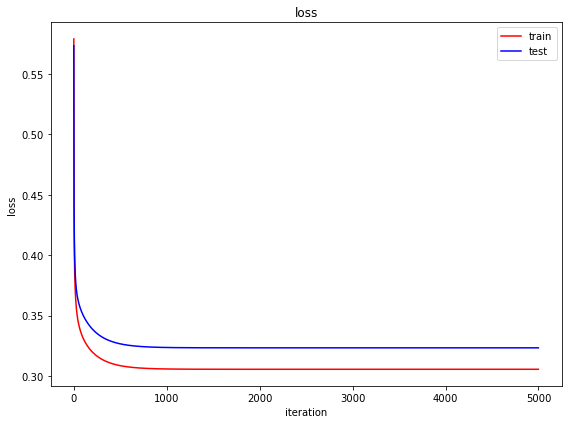

In [85]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

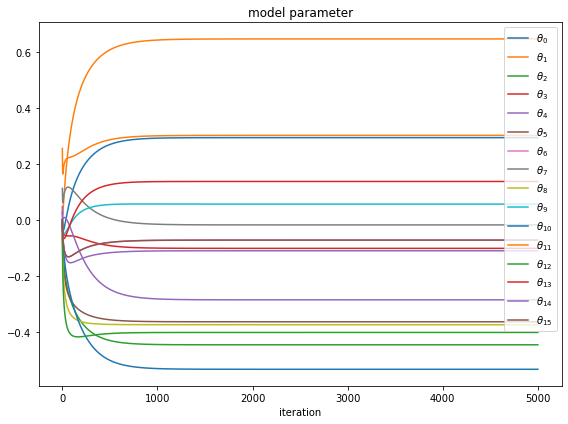

In [86]:
plot_model_parameter(theta_iteration)

In [87]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    #
    # 
    # fill up the function body
    #
    #

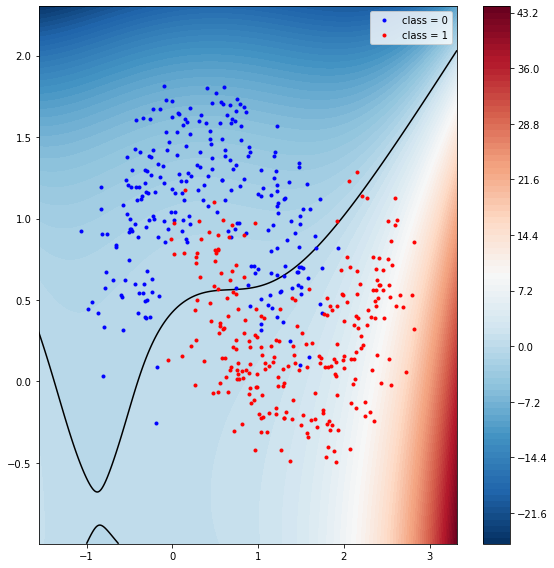

In [88]:
plot_classifier(data_train, theta_optimal)

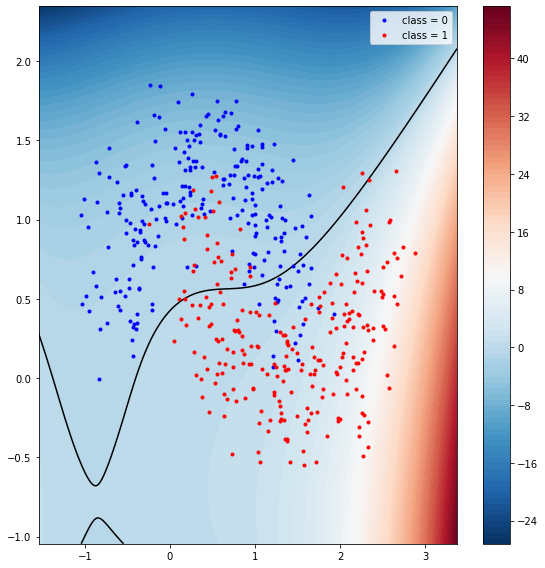

In [89]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

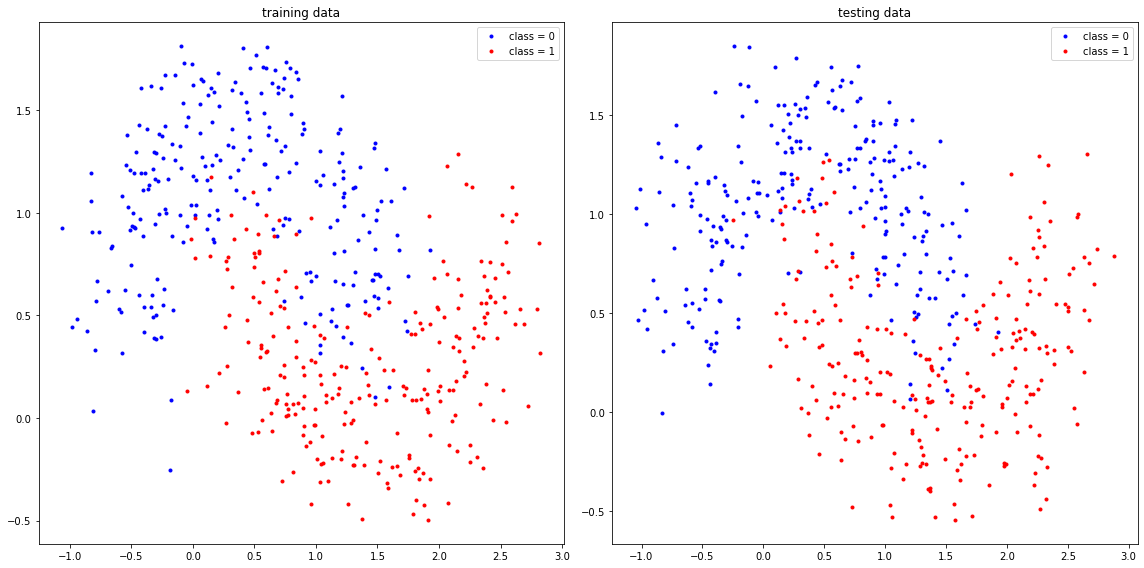

In [90]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

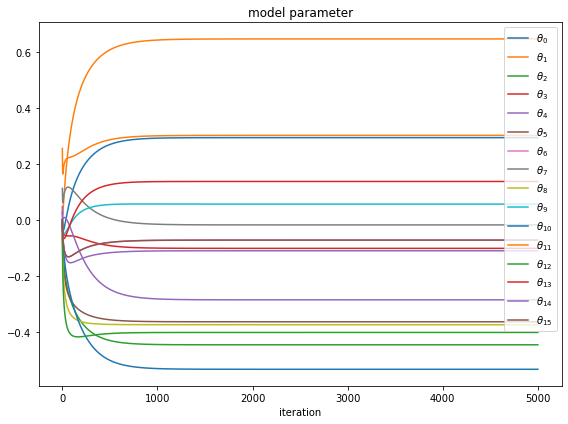

In [91]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

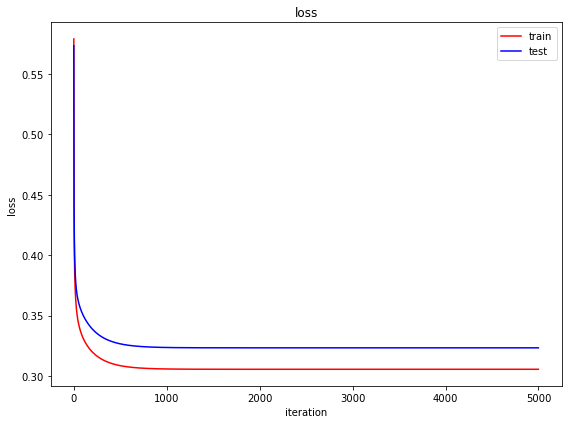

In [92]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

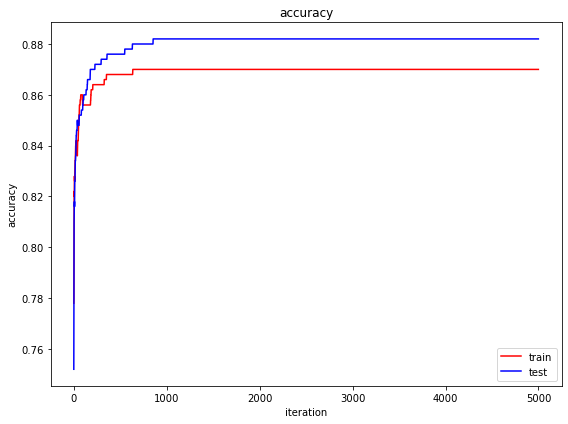

In [93]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

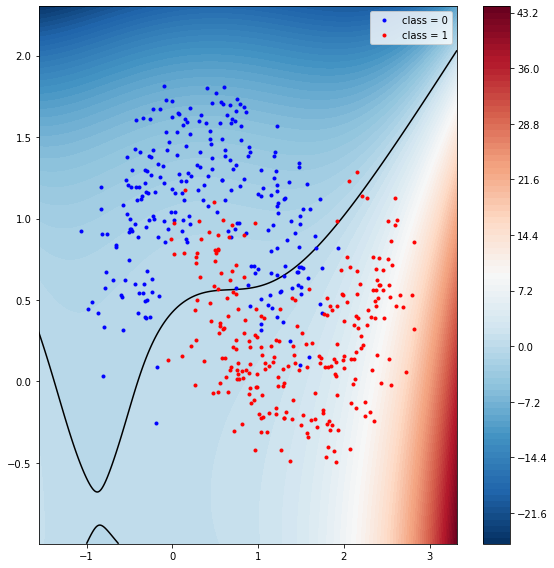

In [94]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

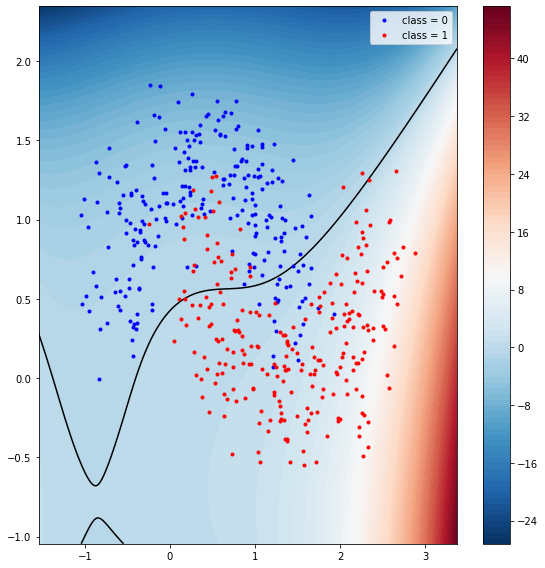

In [95]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [96]:
print('accuract(train): {}'.format(accuracy_train))
print('accuracy(test) : {}'.format(accuracy_test))

accuract(train): 0.87
accuracy(test) : 0.882
